# Project: Breast Cancer Wisconsin (Diagnostic)

## Datasets
**Breast Cancer Wisconsin (Diagnostic) Dataset**: Computed features from a digitized image of a fine needle aspirate (FNA) of a breast mass. [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)


## Project Structure


### 1. Package and Module Installation


In [1]:
# import library that needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### 2. Data Loading and Preprocessing

Load the chosen dataset and preprocess it for deep learning.

In [2]:
# Load the data
url = 'https://archive.ics.uci.edu/static/public/17/data.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
# find out the architecture of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

there is no null data. Good data
There is 2 category for diagnosis, M (Malignant/ganas) and B (Benign/Jinak)

In [5]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


In [6]:
# change diagnosis value from str to float
df['Diagnosis'] = df['Diagnosis'].map({'M':1.0, 'B':0.0})   # 1.0 for Malignant and 0.0 for Benign

print(df['Diagnosis'].head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Diagnosis, dtype: float64


In [7]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
0.0,357
1.0,212


### 3. Model Building

Define deep learning model's architecture.

In [8]:
# create a model class that inherits nn.module
class Model(nn.Module):
  def __init__(self, in_features=30, h1=8, h2=9, out_features=2):
    super().__init__()            #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [9]:
# pick a manual seed for randomization
torch.manual_seed(41)

# create an instance of model
model = Model()

### 4. Model Training

Train model and evaluate its performance using validation data.

In [10]:
# set X and y
X = df.drop(['ID','Diagnosis'], axis=1)
y = df['Diagnosis']

In [11]:
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
# convert these to numpy value
X = X.values
y = y.values

In [13]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [14]:
# split train data and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

# convert X features to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
# set the criterin of model
criterion = nn.CrossEntropyLoss()

# choose adam optimiser, learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=30, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=2, bias=True)
)>

In [17]:
# train the model
# dl_loss_value = []
# epoch
epochs = 100
losses = []
for i in range(epochs):
  # go forward
  y_pred = model.forward(X_train)     # get predicted result

  # measure loss
  loss = criterion(y_pred, y_train)    # predicted vs train

  # keep track our losses
  losses.append(loss.detach().numpy())
  # dl_loss_value.append(loss.item())

  # print every ten epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # do some backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 2.6330366134643555
Epoch: 10 and loss: 0.47536391019821167
Epoch: 20 and loss: 0.33856645226478577
Epoch: 30 and loss: 0.2507191300392151
Epoch: 40 and loss: 0.23812174797058105
Epoch: 50 and loss: 0.21882638335227966
Epoch: 60 and loss: 0.21157774329185486
Epoch: 70 and loss: 0.20633094012737274
Epoch: 80 and loss: 0.20150373876094818
Epoch: 90 and loss: 0.19672101736068726


In [18]:
losses

[array(2.6330366, dtype=float32),
 array(0.97051936, dtype=float32),
 array(1.5426607, dtype=float32),
 array(1.0650398, dtype=float32),
 array(0.6326365, dtype=float32),
 array(0.6260786, dtype=float32),
 array(0.6639746, dtype=float32),
 array(0.41887218, dtype=float32),
 array(0.4060849, dtype=float32),
 array(0.59608716, dtype=float32),
 array(0.4753639, dtype=float32),
 array(0.3189915, dtype=float32),
 array(0.41555384, dtype=float32),
 array(0.47331423, dtype=float32),
 array(0.35602123, dtype=float32),
 array(0.30272064, dtype=float32),
 array(0.38082784, dtype=float32),
 array(0.39153054, dtype=float32),
 array(0.30980042, dtype=float32),
 array(0.28713167, dtype=float32),
 array(0.33856645, dtype=float32),
 array(0.3368918, dtype=float32),
 array(0.28161117, dtype=float32),
 array(0.27284685, dtype=float32),
 array(0.30548665, dtype=float32),
 array(0.3005985, dtype=float32),
 array(0.2643192, dtype=float32),
 array(0.25883144, dtype=float32),
 array(0.27980757, dtype=float32

Text(0.5, 0, 'Epoch')

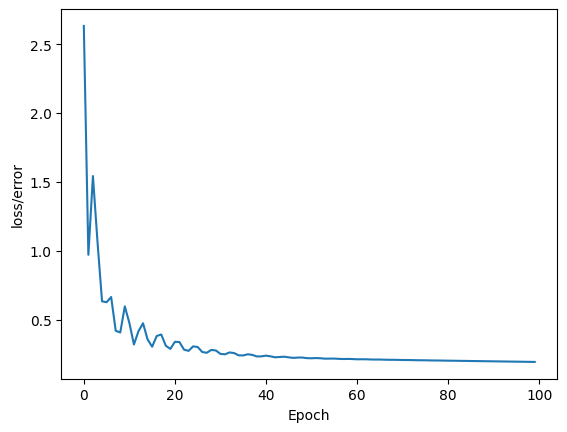

In [19]:
# graph ot out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [20]:
dl_loss_value = loss.item()
dl_loss_value

0.19242791831493378

### 5. Model Evaluation
Evaluate the model's performance on the test data using the grading scheme defined above.

In [21]:
# evaluate model on test data set (validate model on test set)
model.eval()

with torch.no_grad():
  y_eval = model.forward(X_test)
  test_loss = criterion(y_eval, y_test)

  print(f'Test loss : {test_loss.item()}')

Test loss : 0.17427290976047516


In [22]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # corrector not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.) tensor([-4.1940, -7.3071]) 	 0 	 0
2.) tensor([-8.2110, -7.5184]) 	 0 	 1
3.) tensor([-7.2791, -8.1042]) 	 0 	 0
4.) tensor([-5.0337, -6.7420]) 	 0 	 0
5.) tensor([-3.7957, -7.2773]) 	 0 	 0
6.) tensor([-2.1849, -5.3754]) 	 0 	 0
7.) tensor([-36.2607, -18.2460]) 	 1 	 1
8.) tensor([-16.7878, -10.4637]) 	 1 	 1
9.) tensor([-13.5110, -12.6182]) 	 1 	 1
10.) tensor([-2.1057, -6.1960]) 	 0 	 0
11.) tensor([-15.1429,  -3.7825]) 	 1 	 1
12.) tensor([-7.9616, -9.1567]) 	 1 	 0
13.) tensor([-9.8682, -7.8949]) 	 1 	 1
14.) tensor([-4.6257, -7.3669]) 	 0 	 0
15.) tensor([-3.4919, -7.0946]) 	 0 	 0
16.) tensor([-1.8870, -5.2335]) 	 0 	 0
17.) tensor([-2.1700, -5.9236]) 	 0 	 0
18.) tensor([-4.2658, -6.2666]) 	 0 	 0
19.) tensor([-4.3538, -7.7803]) 	 0 	 0
20.) tensor([-3.0375, -6.2820]) 	 0 	 0
21.) tensor([-7.8513, -9.8289]) 	 1 	 0
22.) tensor([-5.3041, -8.8001]) 	 0 	 0
23.) tensor([-7.3068, -8.2491]) 	 0 	 0
24.) tensor([-2.4464, -5.1182]) 	 0 	 0
25.) tensor([-6.3338, -7.4174]) 	 0 	 0
2

In [23]:
# get pred from model
y_pred = torch.argmax(y_eval, dim=1)

# konversi tensor ke numpy arrays
y_test_np = y_test.numpy()
y_pred_np = y_pred.numpy()

In [24]:
# count metrics
dl_accuracy = accuracy_score(y_test_np, y_pred_np)
dl_precision = precision_score(y_test_np, y_pred_np)
dl_recall = recall_score(y_test_np, y_pred_np)
dl_f1 = f1_score(y_test_np, y_pred_np)

print(f'Akurasi: {dl_accuracy:.4f}')
print(f'Precision: {dl_precision:.4f}')
print(f'Recall: {dl_recall:.4f}')
print(f'F1-Score: {dl_f1:.4f}')


Akurasi: 0.9211
Precision: 0.9189
Recall: 0.8500
F1-Score: 0.8831


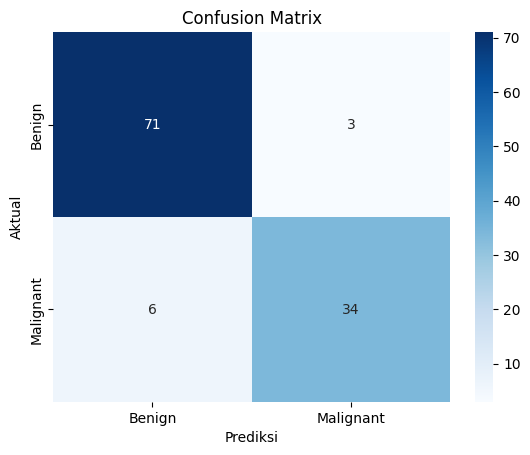

In [25]:
# show confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()
